# Clustering

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [45]:
data = pd.DataFrame({'x':np.random.normal(50,10,50),
                    'y':np.random.normal(50,10,50)})

In [12]:
data.head()

,x,y
0,52.846762,57.462756
1,44.445641,39.537127
2,50.378023,31.711677
3,35.135800,49.236739
4,38.625419,46.074341


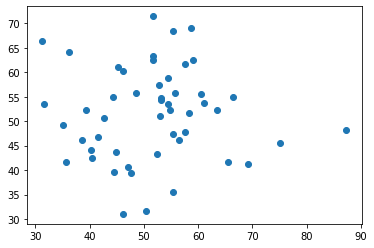

In [15]:
plt.scatter(data['x'],data['y'])
plt.show()

In [18]:
kmeans_model = KMeans(n_clusters = 4)

In [19]:
kmeans_model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
labels = kmeans_model.predict(data)
labels

array([2, 1, 1, 3, 1, 1, 2, 2, 0, 2, 1, 2, 2, 3, 1, 2, 2, 0, 1, 0, 3, 0,
       2, 2, 3, 0, 3, 2, 3, 3, 1, 3, 1, 1, 2, 2, 2, 1, 2, 2, 1, 0, 3, 2,
       2, 1, 2, 2, 2, 2])

In [26]:
centroid = kmeans_model.cluster_centers_
centroid

array([[71.15247052, 47.33555703],
       [44.96993951, 40.45238068],
       [55.23904595, 57.05208285],
       [39.08421574, 56.94593467]])

In [57]:
cmap = {0:'r',1:'b',2:'g',3:'y'}
c = map(lambda x:cmap[x],labels)
color = list(c)

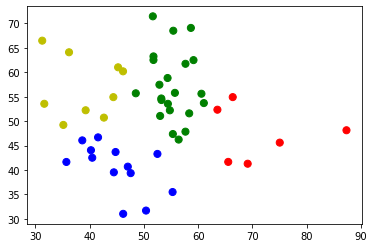

In [31]:
plt.scatter(data['x'],data['y'],color = color, s=50)
plt.show()

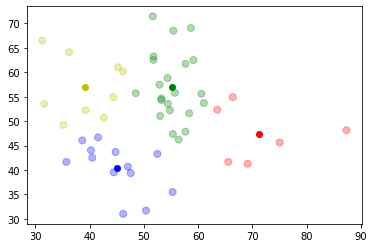

In [34]:

plt.scatter(data['x'],data['y'],color = color, s=50, alpha = 0.3)
for index, center in enumerate(centroid):
    plt.scatter(*center, color = cmap[index])
plt.show()

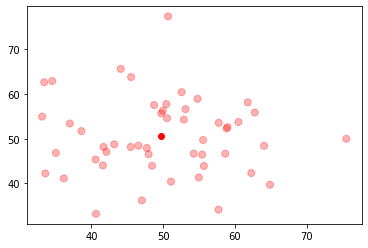

In [47]:
kmeans_model1 = KMeans(n_clusters = 1)
kmeans_model1.fit(data)

labels1 = kmeans_model1.predict(data)
centroid1 = kmeans_model1.cluster_centers_
cmap = {0:'r'}
c = map(lambda x:cmap[x],labels1)
color = list(c)
plt.scatter(data['x'],data['y'],color = color, s=50, alpha = 0.3)

labels1 = kmeans_model1.predict(data)
for index, center in enumerate(centroid1):
    plt.scatter(*center, color = cmap[index])
plt.show()

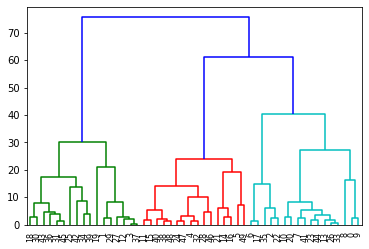

In [48]:
import scipy.cluster.hierarchy  as hp 
dendrogram = hp.dendrogram(hp.linkage(data,method = 'ward')) 
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering #heigher form of hierarchical clostering 

In [63]:
hier_model = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

In [64]:
y_pred = hier_model.fit_predict(data)
y_pred

array([0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1,
       0, 1, 2, 2, 2, 2], dtype=int64)

In [59]:
c = map(lambda x:cmap[x],y_pred)
color = list(c)

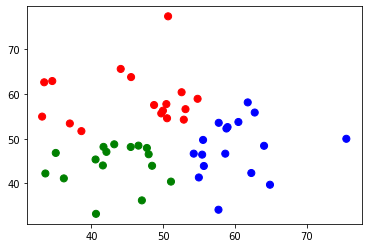

In [60]:
plt.scatter(data['x'],data['y'],color = color, s=50)
plt.show()